# Exercise
## Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.
1. Measure prediction score using default n_estimators (10)
2. Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

<img src='iris.png' width=200 height='100'/>

# Importing Libraries and DataSet

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## DataSet

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.data[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Exploratory Data Analysis

## Checking for NaN in data

In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
flower_name          0
dtype: int64

## Visualization of Dataset

In [8]:
df0 = df[df.target.eq(0)]
df1 = df[df.target.eq(1)]
df2 = df[df.target.eq(2)]

## Sepal length vs Sepal Width (Setosa vs Versicolor)

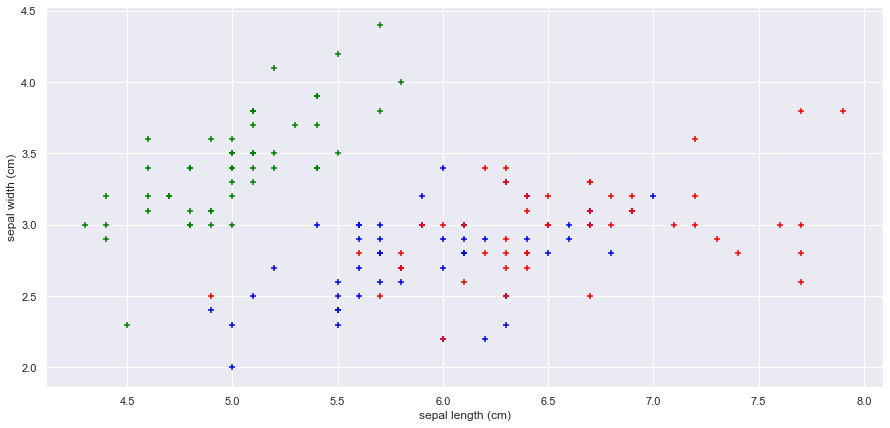

In [9]:
plt.figure(figsize=(15,7))
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='+')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', marker='+')

## Petal length vs Petal Width (Setosa vs Versicolor)

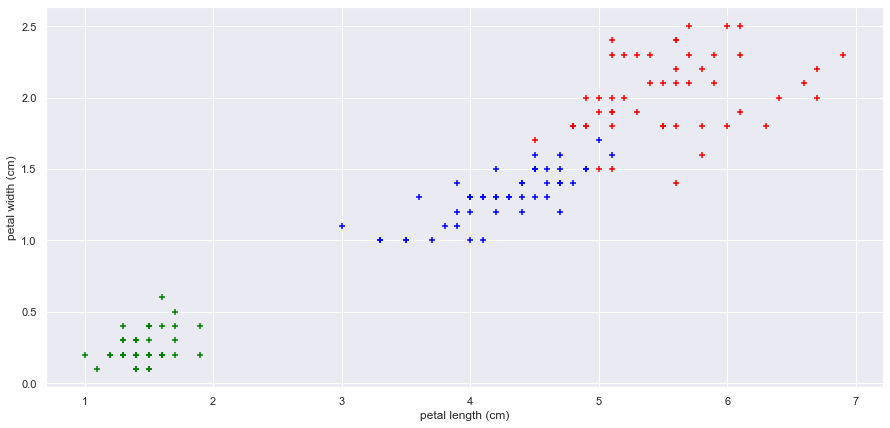

In [10]:
plt.figure(figsize=(15,7))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='+')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red', marker='+')

# Separating Dataset into Train and Test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(['target', 'flower_name'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
len(X_train)

120

In [14]:
len(X_test)

30

# Creating the Model

In [44]:
from sklearn.ensemble import RandomForestClassifier

## 10 estimators

In [45]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9

## 20 estimators

In [46]:
model_20 = RandomForestClassifier(n_estimators=20)
model_20.fit(X_train, y_train)
model_20.score(X_test, y_test)

0.9

## 100 estimators

In [47]:
model_100 = RandomForestClassifier(n_estimators=100)
model_100.fit(X_train, y_train)
model_100.score(X_test, y_test)

0.9333333333333333

# Confusion Matrix

In [48]:
y_predicted = model.predict(X_test)
y_predicted_20 = model_20.predict(X_test)
y_predicted_100 = model_100.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  2,  8]], dtype=int64)

Text(156.5, 0.5, 'Truth')

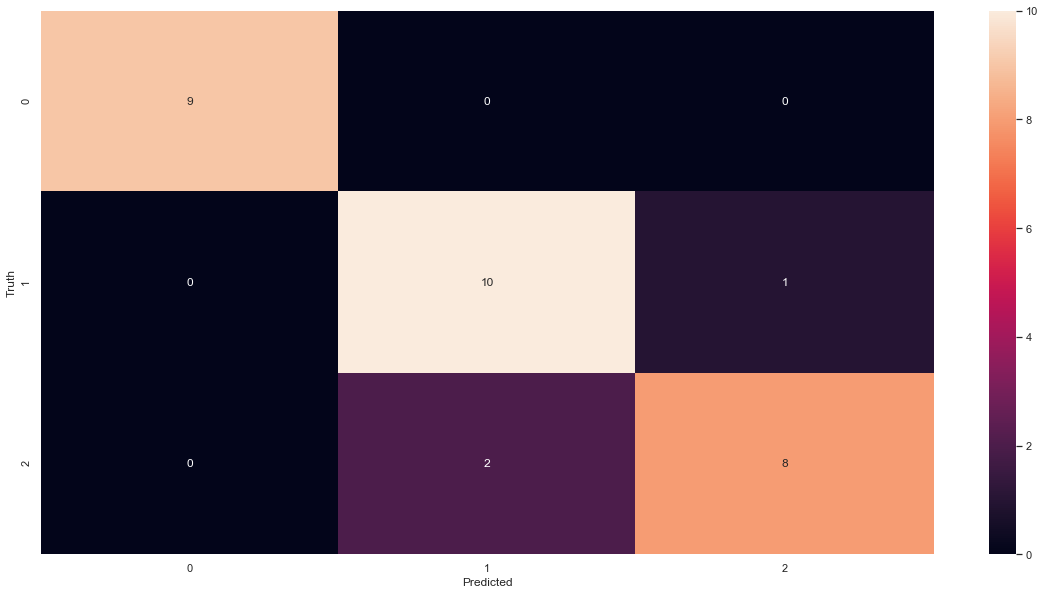

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
cm_20 = confusion_matrix(y_test, y_predicted_20)
cm_20

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  2,  8]], dtype=int64)

Text(156.5, 0.5, 'Truth')

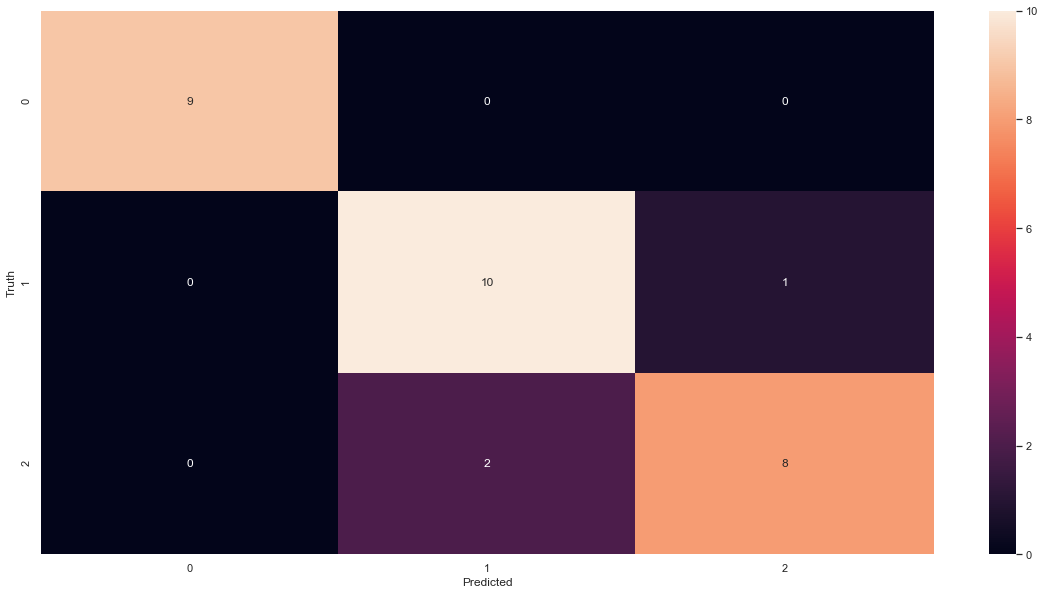

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(cm_20, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
cm_100 = confusion_matrix(y_test, y_predicted_100)
cm_100

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  1,  9]], dtype=int64)

Text(156.5, 0.5, 'Truth')

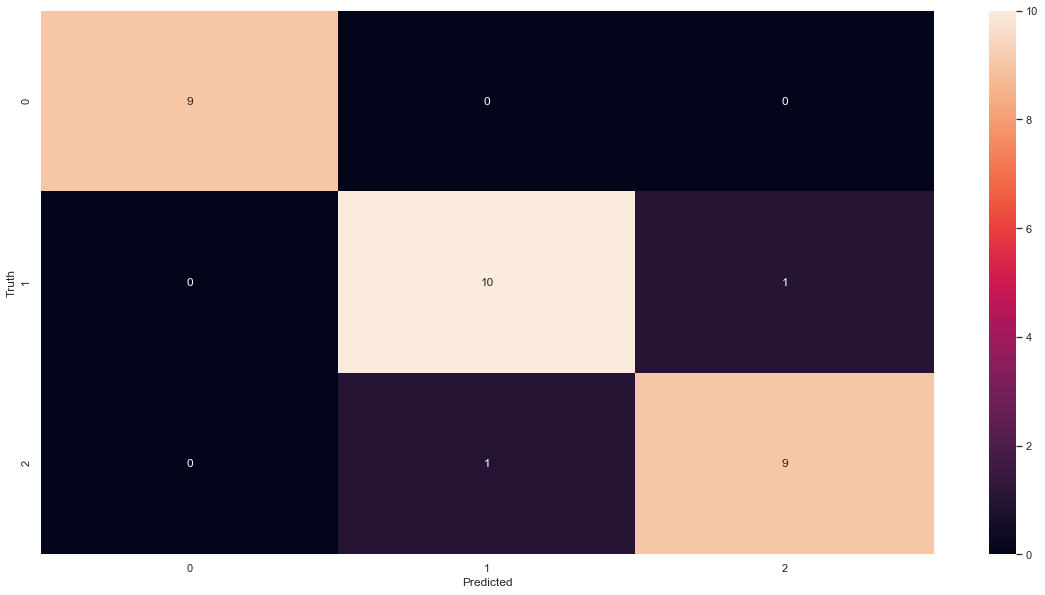

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(cm_100, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Scores

<BarContainer object of 3 artists>

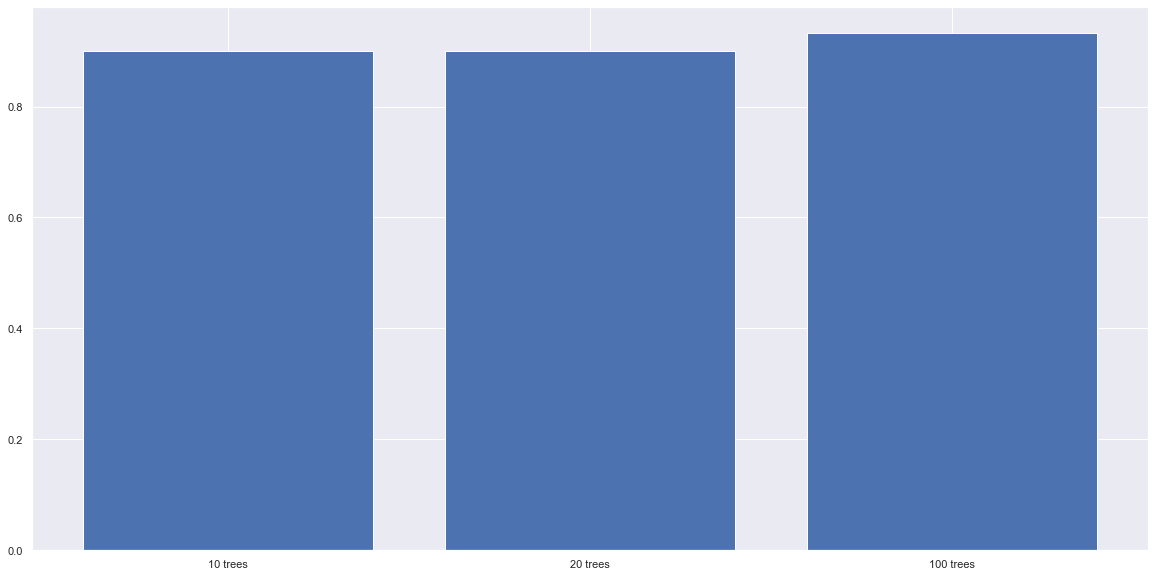

In [55]:
plt.figure(figsize=(20,10))
plt.bar(x=['10 trees', '20 trees', '100 trees'], height=[model.score(X_test, y_test), model_20.score(X_test, y_test), model_100.score(X_test, y_test)])